### Ejercicios Práctica 6 ###

In [191]:
import seaborn as sns
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from scipy import stats
import numpy as np
import pandas as pd
import seaborn.objects as so
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from formulaic import model_matrix
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

1. A partir del dataset penguins, crear un subconjunto de datos que contenga sólo pingüinos de
la isla Biscoe y que tengan un pico de 48 mm de largo o más.
Sugerencia: recordar que para realizar operaciones lógicas coordenada a coordenada con arrays
de numpy podemos usar los símbolos & (and) y | (or).

In [62]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [63]:
penguins[penguins["island"] == "Biscoe"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,Female
21,Adelie,Biscoe,37.7,18.7,180.0,3600.0,Male
22,Adelie,Biscoe,35.9,19.2,189.0,3800.0,Female
23,Adelie,Biscoe,38.2,18.1,185.0,3950.0,Male
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [64]:
penguins[penguins["bill_length_mm"] >= 48]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
159,Chinstrap,Dream,51.3,18.2,197.0,3750.0,Male
161,Chinstrap,Dream,51.3,19.9,198.0,3700.0,Male
...,...,...,...,...,...,...,...
333,Gentoo,Biscoe,51.5,16.3,230.0,5500.0,Male
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,Male
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,Male
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male


In [65]:
pinguinosBiscoe = penguins[(penguins["island"] == "Biscoe") & (penguins["bill_length_mm"] >= 48)]
pinguinosBiscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
231,Gentoo,Biscoe,49.0,16.1,216.0,5550.0,Male
233,Gentoo,Biscoe,48.4,14.6,213.0,5850.0,Male


2. Crear otro dataset con la información de pingüinos Adelie machos que no sean de isla Biscoe.

In [66]:
pinguinosAdelieMachosNoBiscoe = penguins[(penguins["species"] == "Adelie") & (penguins["sex"] == "Male") & (penguins["island"]!= "Biscoe")]
pinguinosAdelieMachosNoBiscoe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


3. Del dataset penguins quedarse con todas las variables excepto year, sex y body_mass_g.
Sugerencia: utilizar el método .drop() de DataFrames

In [67]:
variables = [col for col in penguins.columns if (col=="year" or col=="sex" or col=="body_mass_g")]
variables

['body_mass_g', 'sex']

In [68]:
pinguinos = penguins.drop(variables, axis = 1)
pinguinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0
...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0
341,Gentoo,Biscoe,50.4,15.7,222.0
342,Gentoo,Biscoe,45.2,14.8,212.0


4(a) En el dataset penguins, eliminar primero todas las filas con datos faltantes. ¿Qué sucede
con los índices?

In [69]:
penguinsClean = penguins.dropna()
penguinsClean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


(b) En el dataset sin datos faltantes, restablecer los índices mediante el comando reset_index().

In [70]:
penguinsClean = penguinsClean.reset_index(drop = True)
penguinsClean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


(c) ¿Cómo podemos hacer todo en un solo comando encadenando operaciones?

In [71]:
penguinsClean = penguinsClean.dropna().reset_index(drop = True)
penguinsClean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


5. Renombrar columnas e índices. Para renombrar columnas utilizamos
.rename(columns = ???)
y para renombrar índices utilizamos
.rename(index = ???).
Realizar las siguientes operaciones en el dataset penguins.

(a) Renombrar la variable species a especies. En este caso debemos pasarle a columns un
diccionario: {’variable_original’ : ’variable nueva’}.

In [72]:
penguins = penguins.rename(columns= {"species" : "especies"})
penguins.head()

,especies,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(b) Renombrar en un solo rename la variable flipper_length_mm a aleta_mm y la variable
body_mass_g a peso_g.

In [73]:
penguins = penguins.rename(columns= {"flipper_length_mm" : "aleta_mm", "body_mass_g" : "peso_g"})
penguins.head()

,especies,island,bill_length_mm,bill_depth_mm,aleta_mm,peso_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(c) Renombrar el índice 0 a “cero”.

In [74]:
#penguins = penguins.rename(index = {0 : "Cero"})
#penguins.head()

(d) Pasar todos los nombres de variables a mayúsculas

In [75]:
penguins = penguins.rename(columns = str.upper)

(e) ¿Qué resultado esperan del siguiente comando? 
penguins.rename(index = np.sqrt)
Que los índices se reemplacen por el valor de su raíz cuadrada

(f) ¿Cómo podemos sumarle uno a todos los índices de penguins? Sugerencia: definir primero
una función suma_uno y utilizar esta función al hacer rename.

In [76]:
def sumaUno(x):
    return (x+1)

In [77]:
penguins = penguins.rename(index = sumaUno)
penguins.head()

,ESPECIES,ISLAND,BILL_LENGTH_MM,BILL_DEPTH_MM,ALETA_MM,PESO_G,SEX
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [78]:
#(h)
penguins = penguins.rename(columns = lambda x : str.upper(x))

6. b) En el dataset penguins, convertir todos los nombres de variables a mayúsculas utilizando listas por comprensión.

In [79]:
penguins.columns = [str.upper(col) for col in penguins.columns]
penguins.head()

,ESPECIES,ISLAND,BILL_LENGTH_MM,BILL_DEPTH_MM,ALETA_MM,PESO_G,SEX
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [80]:
penguins = sns.load_dataset("penguins")

7. En el dataset penguins, convertir solo los nombres de variables que empiezan con bill a mayúsculas
[x * 10 if x % 2 == 0 else x for x in [1,2,3,4,5,6]]

In [81]:
penguins.columns = [str.upper(col) if col[:4] == "bill" else col for col in penguins.columns]
penguins.head()

,species,island,BILL_LENGTH_MM,BILL_DEPTH_MM,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [82]:
penguins = penguins.dropna()

8. Utilizando una funci´on lambda, agregar una nueva columna a la base de datos llamada peso_bin
que contenga:
 “chico” si la masa corporal es menos que 4000 gramos.
 “grande” si la masa corporal es mayor que 4000 gramos.

In [83]:
penguins["peso_bin"] = ["chico" if x < 4000 else "grande" for x in penguins["body_mass_g"]]
penguins

,species,island,BILL_LENGTH_MM,BILL_DEPTH_MM,flipper_length_mm,body_mass_g,sex,peso_bin
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,chico
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,chico
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,chico
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,chico
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,chico
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,grande
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,grande
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,grande
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,grande


9. Crear un subconjunto de los datos de penguins s´olo con las obsevaciones de ping¨uinos machos
con aletas (flipper) de m´as de 200 mm de largo y quedarse con todas las columnas que terminan
con _mm.

In [84]:
otro_penguins = sns.load_dataset("penguins")
otro_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [85]:
otro_penguins = otro_penguins.dropna()

In [86]:
otro_penguins = otro_penguins[((otro_penguins["sex"] == "Male") & (otro_penguins["flipper_length_mm"] > 200))]
otro_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
91,Adelie,Dream,41.1,18.1,205.0,4300.0,Male
95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,Male
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,Male


In [87]:
otro_penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [88]:
print([col for col in otro_penguins.columns if col.endswith("_mm")])

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']


In [89]:
otro = [col for col in otro_penguins.columns if col.endswith("_mm")]
otro_penguins = otro_penguins[otro]
otro_penguins

,bill_length_mm,bill_depth_mm,flipper_length_mm
91,41.1,18.1,205.0
95,40.8,18.9,208.0
101,41.0,20.0,203.0
123,41.4,18.5,202.0
129,44.1,18.0,210.0
...,...,...,...
333,51.5,16.3,230.0
335,55.1,16.0,230.0
337,48.8,16.2,222.0
341,50.4,15.7,222.0


In [90]:
penguins = sns.load_dataset("penguins")

In [91]:
dreamPenguins = penguins.copy()
dreamPenguins = dreamPenguins[dreamPenguins["island"] == "Dream"]
dreamPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
30,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
31,Adelie,Dream,37.2,18.1,178.0,3900.0,Male
32,Adelie,Dream,39.5,17.8,188.0,3300.0,Female
33,Adelie,Dream,40.9,18.9,184.0,3900.0,Male
34,Adelie,Dream,36.4,17.0,195.0,3325.0,Female


(b) contenga solo las variables species y todas las que empiecen con bill

In [92]:
columnas = [col for col in dreamPenguins.columns if (col == "species" or col[:4] == "bill")]
dreamPenguins = dreamPenguins[columnas]

11. Empezando con penguins realizar las siguientes operaciones:

(a) Crear una nueva variable que tenga el peso en kg.


(b) Convertir la variable island a minúscula. Sugerencia: aplicar .str.upper() a la columna.

In [93]:
penguins["body_mass_kg"] = [x/1000 for x in penguins["body_mass_g"]]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.25
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.45


In [94]:
penguins["island"] = [str.lower(x) for x in penguins["island"]]
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,torgersen,40.3,18.0,195.0,3250.0,Female,3.25
3,Adelie,torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,torgersen,36.7,19.3,193.0,3450.0,Female,3.45
...,...,...,...,...,...,...,...,...
339,Gentoo,biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,biscoe,46.8,14.3,215.0,4850.0,Female,4.85
341,Gentoo,biscoe,50.4,15.7,222.0,5750.0,Male,5.75
342,Gentoo,biscoe,45.2,14.8,212.0,5200.0,Female,5.20


In [95]:
penguins.groupby("species")["body_mass_g"]

In [96]:
penguins["body_mass_g"].agg("median")

4050.0

**2. Agregar una columna a penguins con la mediana de la masa corporal de los ping¨uinos de cada
especie usando group_by() y agg().**

(a) Excluya a los ping¨uinos observados en la isla Biscoe

In [97]:
penguinsItem13 = penguins[penguins["island"] != "Biscoe"]
penguinsItem13

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,torgersen,39.1,18.7,181.0,3750.0,Male,3.75
1,Adelie,torgersen,39.5,17.4,186.0,3800.0,Female,3.80
2,Adelie,torgersen,40.3,18.0,195.0,3250.0,Female,3.25
3,Adelie,torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,torgersen,36.7,19.3,193.0,3450.0,Female,3.45
...,...,...,...,...,...,...,...,...
339,Gentoo,biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,biscoe,46.8,14.3,215.0,4850.0,Female,4.85
341,Gentoo,biscoe,50.4,15.7,222.0,5750.0,Male,5.75
342,Gentoo,biscoe,45.2,14.8,212.0,5200.0,Female,5.20


(b) S´olo se quede con las variables que est´an entre species y body_mass_g inclusive.

In [98]:
columnas = penguinsItem13.columns[0:6]
penguinsItem13 = penguinsItem13[columnas]

(c) Renombre la variable species a especie_pinguino.

In [99]:
penguinsItem13 = penguinsItem13.rename(columns = {"species" : "especie_pingüino"})
penguinsItem13

,especie_pingüino,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,torgersen,39.1,18.7,181.0,3750.0
1,Adelie,torgersen,39.5,17.4,186.0,3800.0
2,Adelie,torgersen,40.3,18.0,195.0,3250.0
3,Adelie,torgersen,NaN,NaN,NaN,NaN
4,Adelie,torgersen,36.7,19.3,193.0,3450.0
...,...,...,...,...,...,...
339,Gentoo,biscoe,NaN,NaN,NaN,NaN
340,Gentoo,biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,biscoe,45.2,14.8,212.0,5200.0


**(e)** Calcule el valor medio de las variables que contienen el string “length”, separando por
la especie del ping¨uino, y llamando a las columnas como las originales pero agregando
“ mean” al final.

In [100]:
agrupados = penguinsItem13.groupby("especie_pingüino")

In [111]:
bill_length_mm_mean = agrupados["bill_length_mm"].mean()
flipper_length_mm_mean = agrupados["flipper_length_mm"].mean()
print(bill_length_mm_mean, flipper_length_mm_mean)

especie_pingüino
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: bill_length_mm, dtype: float64 especie_pingüino
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64


In [115]:
bill_length_mm_mean[0]
bill_length_mm_mean.iloc[0]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11928\1969454323.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bill_length_mm_mean[0]


38.79139072847682

In [120]:
penguinsItem13["bill_length_mm_mean"] = [bill_length_mm_mean.iloc[0] if (x == "Adelie") else (bill_length_mm_mean.iloc[1] if (x == "Chinstrap") else bill_length_mm_mean.iloc[2]) for x in penguinsItem13["especie_pingüino"]]
penguinsItem13["flipper_length_mm_mean"] = [flipper_length_mm_mean.iloc[0] if (x == "Adelie") else (flipper_length_mm_mean.iloc[1] if (x == "Chinstrap") else flipper_length_mm_mean.iloc[2]) for x in penguinsItem13["especie_pingüino"]]
penguinsItem13

,especie_pingüino,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_length_mm_mean,flipper_length_mm_mean
0,Adelie,torgersen,39.1,18.7,181.0,3750.0,38.791391,189.953642
1,Adelie,torgersen,39.5,17.4,186.0,3800.0,38.791391,189.953642
2,Adelie,torgersen,40.3,18.0,195.0,3250.0,38.791391,189.953642
3,Adelie,torgersen,NaN,NaN,NaN,NaN,38.791391,189.953642
4,Adelie,torgersen,36.7,19.3,193.0,3450.0,38.791391,189.953642
...,...,...,...,...,...,...,...,...
339,Gentoo,biscoe,NaN,NaN,NaN,NaN,47.504878,217.186992
340,Gentoo,biscoe,46.8,14.3,215.0,4850.0,47.504878,217.186992
341,Gentoo,biscoe,50.4,15.7,222.0,5750.0,47.504878,217.186992
342,Gentoo,biscoe,45.2,14.8,212.0,5200.0,47.504878,217.186992


**4. (a)** Cargar el archivo en un DataFrame macroFull utilizando la columna anio como index.

In [121]:
macroFull = pd.read_csv("macro_full_columns.csv")

In [122]:
macroFull = macroFull.set_index("Anio")

In [123]:
macroFull.head()

,Unnamed: 0,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__vari_Porc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,1,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,2,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,3,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,4,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,5,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


(b) Listar todos los nombres de columnas, y eliminar del DataFrame la columna Unnamed: 0

In [124]:
columnas = macroFull.columns.unique()
columnas

Index(['Unnamed: 0', 'FBKF.Construcciones.Priv_Publ',
       'FBKF.Equi_Dur_Prod.Mat_Transp.Nac',
       'FBKF.Equi_Dur_Prod.Mat_Transp.Import',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac',
       'FBKF.Equi_Dur_Prod.Maqui_YEqui.Import', 'Consumo.Hogares',
       'Consumo.Gobierno', 'Exportaciones', 'Importaciones', 'GIB', 'FKBF',
       'EXPO_TOT_2004', 'EXPO_AGROP_2004', 'EXPO_PAMP_2004',
       'EXPO_PECUAR_2004', 'EXPO_CARNES_2004', 'EXPO_LECHE_2004',
       'EXPO_LANAS_2004', 'EXPO_CUEROS_PP_2004', 'EXPO_AGRIC_2004',
       'EXPO_CEREAL_2004', 'EXPO_OLEAGI_2004', 'EXPO_OTAGRIC_2004',
       'EXPO_PESCA_2004', 'EXPO_INDUST_2004', 'EXPO_ALIMENT_2004',
       'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004',
       'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004',
       'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004',
       'EXPO_RESTOIND_2004', 'Consumo.Hogares.ipi.demanda',
       'Consumo.Gobierno.ipi.demanda',
       'FBKF.Construcciones.Pr

In [125]:
macroFull = macroFull.drop('Unnamed: 0', axis=1)

In [126]:
macroFull

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__vari_Porc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,66813943052,1.189902e+10,7.661349e+09,23759578339,4.132673e+10,5.014680e+11,80184420870,1.598420e+11,1.901440e+11,7.098460e+11,...,7.118760e+11,17252.803350,12153.418950,3506.313415,0.048057,0.072793,0.138625,7.118760e+11,1.467438,0.060211
2012,64700327691,1.193748e+10,5.518154e+09,21650676546,3.568329e+10,4.998770e+11,82549920556,1.531870e+11,1.810490e+11,7.045170e+11,...,7.064210e+11,16927.042940,11977.906860,3255.742019,-0.018882,-0.014441,-0.071463,7.064210e+11,1.456192,-0.007664
2013,64634666531,1.378317e+10,7.239125e+09,24156151830,3.373643e+10,5.165960e+11,86152836238,1.464500e+11,1.863680e+11,7.206500e+11,...,7.220400e+11,17108.767060,12240.750480,3317.537236,0.010736,0.021944,0.018980,7.220400e+11,1.488389,0.022110


**(c) Observamos que algunas columnas terminan con el prefijo vari_Porc y otras con el prefijo
variPorc. Cambiar el final de todas las columnas terminadas en vari_Porc a variPorc.**

In [129]:
macroFull.columns = [col[:-9] + "variPorc" if col.endswith("vari_Porc") else col for col in macroFull.columns]
macroFull
# el col[:-9] toma la primera parte de la palabra menos los últimos 9 caracteres, que serían vari_Porc)

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_Per_Cap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__variPorc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,66813943052,1.189902e+10,7.661349e+09,23759578339,4.132673e+10,5.014680e+11,80184420870,1.598420e+11,1.901440e+11,7.098460e+11,...,7.118760e+11,17252.803350,12153.418950,3506.313415,0.048057,0.072793,0.138625,7.118760e+11,1.467438,0.060211
2012,64700327691,1.193748e+10,5.518154e+09,21650676546,3.568329e+10,4.998770e+11,82549920556,1.531870e+11,1.810490e+11,7.045170e+11,...,7.064210e+11,16927.042940,11977.906860,3255.742019,-0.018882,-0.014441,-0.071463,7.064210e+11,1.456192,-0.007664
2013,64634666531,1.378317e+10,7.239125e+09,24156151830,3.373643e+10,5.165960e+11,86152836238,1.464500e+11,1.863680e+11,7.206500e+11,...,7.220400e+11,17108.767060,12240.750480,3317.537236,0.010736,0.021944,0.018980,7.220400e+11,1.488389,0.022110


**(d)** Modificar también todos los nombres de columnas terminados en _Per_Cap a _perCap

In [130]:
macroFull.columns = [col[:-8] + "_perCap" if col.endswith("_Per_Cap") else col for col in macroFull.columns]
macroFull

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_perCap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__variPorc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,NaN,NaN,NaN,1.420980e+11,0.292917,NaN
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,66813943052,1.189902e+10,7.661349e+09,23759578339,4.132673e+10,5.014680e+11,80184420870,1.598420e+11,1.901440e+11,7.098460e+11,...,7.118760e+11,17252.803350,12153.418950,3506.313415,0.048057,0.072793,0.138625,7.118760e+11,1.467438,0.060211
2012,64700327691,1.193748e+10,5.518154e+09,21650676546,3.568329e+10,4.998770e+11,82549920556,1.531870e+11,1.810490e+11,7.045170e+11,...,7.064210e+11,16927.042940,11977.906860,3255.742019,-0.018882,-0.014441,-0.071463,7.064210e+11,1.456192,-0.007664
2013,64634666531,1.378317e+10,7.239125e+09,24156151830,3.373643e+10,5.165960e+11,86152836238,1.464500e+11,1.863680e+11,7.206500e+11,...,7.220400e+11,17108.767060,12240.750480,3317.537236,0.010736,0.021944,0.018980,7.220400e+11,1.488389,0.022110


**15. (a)** ¿En qué columnas hay datos faltantes? Podemos usar df.isnull().any(axis = ???).
¿Cómo podemos generar una lista que tenga solamente los nombres de las columnas con
datos faltantes?

In [160]:
a = macroFull.isnull().any(axis=0)
datos_faltantes = a[a == True]
datos_faltantes = datos_faltantes.index
print(datos_faltantes.tolist())

['EXPO_OTAGRIC_2004', 'EXPO_PESCA_2004', 'EXPO_ALIMENT_2004', 'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004', 'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004', 'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004', 'EXPO_RESTOIND_2004', 'PIB_perCap__variPorc', 'Vol_Cons_Hogares_per_Cap__variPorc', 'Vol_FBKF_perCap__variPorc', 'IPI__variPorc']


**(b)** ¿En qu´e a˜nos hay datos faltantes? Listar todos los a˜nos con datos faltantes.

In [162]:
b = macroFull.isnull().any(axis=1)
datosFaltantes = b[b==True]
datosFaltantes = datosFaltantes.index.tolist()
print(datosFaltantes)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]


**(c)** Convertir todos los datos faltantes a 0.

In [165]:
#15c) fillna() permite reemplazar los valores nulos con un valor específico, en este caso, 0.
#inplace=True modifica el DataFrame original directamente sin necesidad de asignarlo a una nueva variable
macroFull.fillna(0, inplace=True)
macroFull.head()

,FBKF.Construcciones.Priv_Publ,FBKF.Equi_Dur_Prod.Mat_Transp.Nac,FBKF.Equi_Dur_Prod.Mat_Transp.Import,FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac,FBKF.Equi_Dur_Prod.Maqui_YEqui.Import,Consumo.Hogares,Consumo.Gobierno,Exportaciones,Importaciones,GIB,...,PBI_a_precios_de_mercado.oferta,Vol_PIB_perCap,Vol_Consumo_Hogares_perCap,Vol_FBKF_perCap,PIB_perCap__variPorc,Vol_Cons_Hogares_per_Cap__variPorc,Vol_FBKF_perCap__variPorc,Vol_PIB_encaden_Fisher_2004,IPI_volumen,IPI__variPorc
Anio,,,,,,,,,,,,,,,,,,,,,
1950,20353627362,6.685869e+08,5.844002e+08,3119383475,8.631124e+08,1.046560e+11,21706316451,1.072959e+10,1.403947e+10,1.420980e+11,...,1.420980e+11,8230.718755,6061.927168,1265.389774,0.000000,0.000000,0.000000,1.420980e+11,0.292917,0.000000
1951,21739314091,8.427402e+08,2.532758e+09,3562534310,1.292775e+09,1.105380e+11,21767097618,8.455494e+09,1.574444e+10,1.474360e+11,...,1.474360e+11,8360.967138,6268.494407,1442.153759,0.015825,0.034076,0.139691,1.474360e+11,0.303920,0.037563
1952,19685428171,1.119084e+09,1.484422e+09,3440750327,1.088416e+09,1.051080e+11,21455589059,6.224082e+09,1.163759e+10,1.404910e+11,...,1.404910e+11,7806.866125,5840.680245,1293.154332,-0.066272,-0.068248,-0.103317,1.404910e+11,0.289604,-0.047104
1953,20237375978,1.207891e+09,1.459989e+09,3621895632,8.869267e+08,1.064030e+11,20742065172,9.619869e+09,9.626751e+09,1.473240e+11,...,1.473240e+11,8027.665603,5797.868309,1290.488829,0.028283,-0.007330,-0.002061,1.473240e+11,0.303689,0.048637
1954,19372130307,1.173452e+09,8.059002e+08,4121320340,7.830799e+08,1.143920e+11,21238933697,1.020162e+10,1.250629e+10,1.533160e+11,...,1.533160e+11,8196.878491,6115.886428,1230.475866,0.021079,0.054851,-0.046504,1.533160e+11,0.316039,0.040667


**16.** Variables de oferta.

**(a)** Generar un DataFrame que contenga solo las variables que terminan con .oferta. ¿Hab´ıa
datos faltantes en estas columnas?

In [178]:
oferta = macroFull.copy()
oferta = oferta[[col for col in oferta.columns if col.endswith(".oferta")]]
display(oferta.head())
print("hay datos faltantes? :" , oferta.isnull().any(axis=0)) # no hay datos faltantes

,Agricultura_caza_silvicultura_y_pesca.oferta,Explotacion_de_minas_y_canteras.oferta,Industria_manufacturera.oferta,Electricidad_gas_y_agua.oferta,Construccion.oferta,Comercio_hoteles_y_restaurantes.oferta,Transp_Almac_y_Comunics.oferta,Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta,Servs_Socs_Comunales_Y_Personales.oferta,Impuesto_Prod_Netos_De_Subsid.oferta,PBI_a_precios_de_mercado.oferta
Anio,,,,,,,,,,,
1950,13696637358,1452011417,3.230475e+10,198218385.1,5918090281,2.528165e+10,7262970408,1.955076e+10,2.174366e+10,1.469771e+10,1.420980e+11
1951,14629457210,1686941522,3.314928e+10,212725994.5,6060937395,2.626086e+10,7534071597,1.990274e+10,2.236844e+10,1.539495e+10,1.474360e+11
1952,12545616104,1794762161,3.252291e+10,227896262.1,5571363747,2.441732e+10,7017131008,2.059880e+10,2.257738e+10,1.464870e+10,1.404910e+11
1953,16402296333,1925706862,3.234105e+10,242404260.9,5546340195,2.400975e+10,7210541490,2.071623e+10,2.307222e+10,1.525787e+10,1.473240e+11
1954,16308747029,2037374129,3.490353e+10,263839496.4,5308705373,2.549291e+10,7558082163,2.127848e+10,2.379781e+10,1.607831e+10,1.533160e+11


hay datos faltantes? : Agricultura_caza_silvicultura_y_pesca.oferta     False
Explotacion_de_minas_y_canteras.oferta           False
Industria_manufacturera.oferta                   False
Electricidad_gas_y_agua.oferta                   False
Construccion.oferta                              False
Comercio_hoteles_y_restaurantes.oferta           False
Transp_Almac_y_Comunics.oferta                   False
Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta    False
Servs_Socs_Comunales_Y_Personales.oferta         False
Impuesto_Prod_Netos_De_Subsid.oferta             False
PBI_a_precios_de_mercado.oferta                  False
dtype: bool


**(b)** Queremos explicar la variable PBI_a_precios_de_mercado.oferta utilizando el resto de
las variables de oferta. Crear un DataFrame X que contenga todas las variables de oferta
excepto la de PBI y una Series y que contenga solo la variable de PBI.

In [249]:
y = macroFull["PBI_a_precios_de_mercado.oferta"]
X = macroFull.loc[:, macroFull.columns.str.endswith(".oferta")]
X = X.drop("PBI_a_precios_de_mercado.oferta", axis=1)
X.head()

,Agricultura_caza_silvicultura_y_pesca.oferta,Explotacion_de_minas_y_canteras.oferta,Industria_manufacturera.oferta,Electricidad_gas_y_agua.oferta,Construccion.oferta,Comercio_hoteles_y_restaurantes.oferta,Transp_Almac_y_Comunics.oferta,Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta,Servs_Socs_Comunales_Y_Personales.oferta,Impuesto_Prod_Netos_De_Subsid.oferta
Anio,,,,,,,,,,
1950,13696637358,1452011417,3.230475e+10,198218385.1,5918090281,2.528165e+10,7262970408,1.955076e+10,2.174366e+10,1.469771e+10
1951,14629457210,1686941522,3.314928e+10,212725994.5,6060937395,2.626086e+10,7534071597,1.990274e+10,2.236844e+10,1.539495e+10
1952,12545616104,1794762161,3.252291e+10,227896262.1,5571363747,2.441732e+10,7017131008,2.059880e+10,2.257738e+10,1.464870e+10
1953,16402296333,1925706862,3.234105e+10,242404260.9,5546340195,2.400975e+10,7210541490,2.071623e+10,2.307222e+10,1.525787e+10
1954,16308747029,2037374129,3.490353e+10,263839496.4,5308705373,2.549291e+10,7558082163,2.127848e+10,2.379781e+10,1.607831e+10


**(c)** Ajustar un modelo de regresi´on lineal ordinaria o Ridge y generar el vector de predicciones
(hacerlo sobre el conjunto de todos los datos, no es necesario separar en entrenamiento y
testeo).

In [272]:
modelo = linear_model.LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
recm = np.sqrt(mean_squared_error(y, y_pred))
print(r2, recm)
y_pred

0.9999659300091409 944504472.0341355


array([1.42404728e+11, 1.47154838e+11, 1.42460680e+11, 1.47218554e+11,
       1.53087196e+11, 1.63057868e+11, 1.68112710e+11, 1.76874167e+11,
       1.87676222e+11, 1.76524292e+11, 1.90094309e+11, 2.03089009e+11,
       1.99456847e+11, 1.96407801e+11, 2.14908549e+11, 2.33202595e+11,
       2.37092098e+11, 2.44360070e+11, 2.56432456e+11, 2.77398133e+11,
       2.90263358e+11, 3.01804345e+11, 3.07834528e+11, 3.17329515e+11,
       3.37281587e+11, 3.33359567e+11, 3.30349397e+11, 3.53732770e+11,
       3.39911023e+11, 3.64962827e+11, 3.69183394e+11, 3.49122931e+11,
       3.43070666e+11, 3.58173643e+11, 3.62822586e+11, 3.36765205e+11,
       3.59825056e+11, 3.71120869e+11, 3.63967879e+11, 3.37176367e+11,
       3.29271313e+11, 3.60799317e+11, 3.89599897e+11, 4.10542366e+11,
       4.34358791e+11, 4.22836105e+11, 4.45687211e+11, 4.81321990e+11,
       4.99429921e+11, 4.81196641e+11, 4.76629357e+11, 4.55825422e+11,
       4.06255706e+11, 4.45295573e+11, 4.85466107e+11, 5.28745678e+11,
      

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


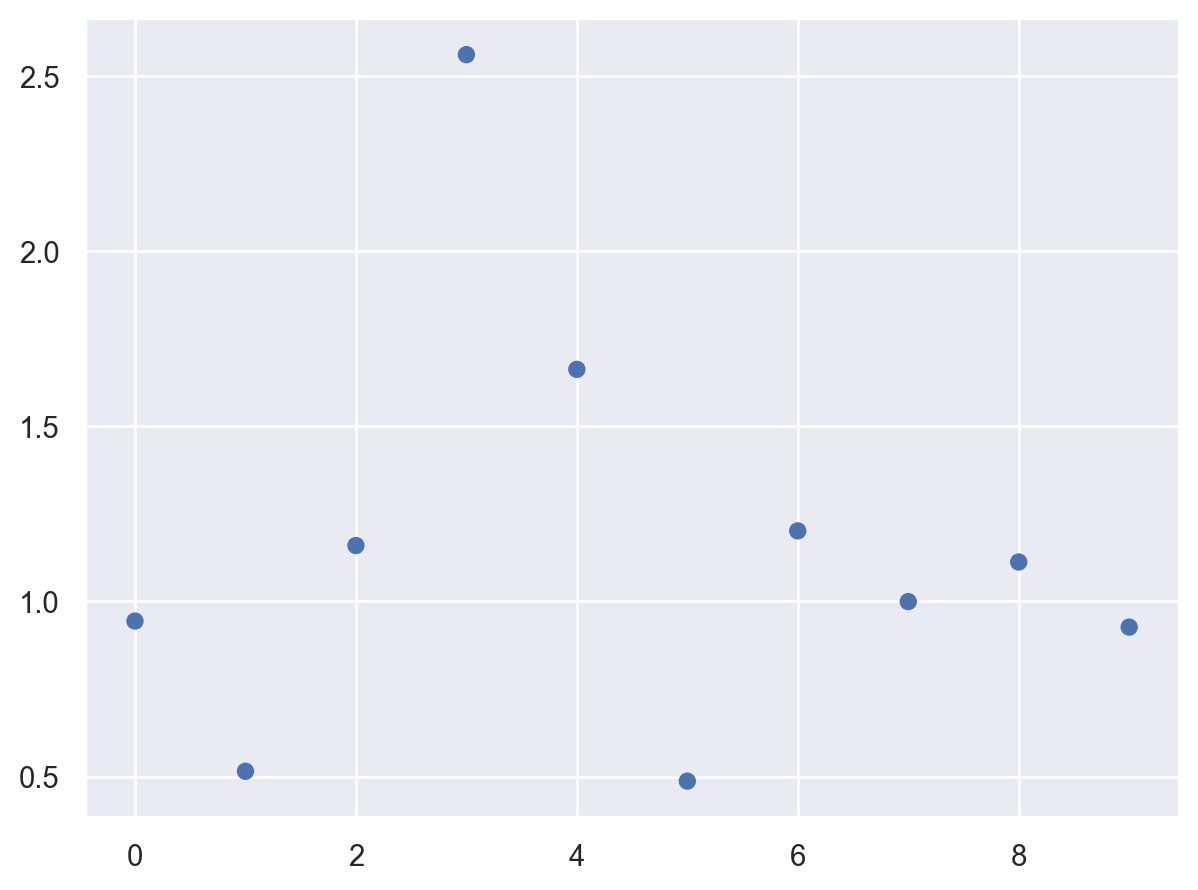

In [269]:
so.Plot(x = np.arange(len(modelo.coef_)), y = modelo.coef_).add(so.Dot())

# Cómo haría con Ridge?

In [271]:
alphas = np.array([0.001, 0.1, 1, 10, 100])
for alpha in alphas:
    modeloRidge = linear_model.Ridge(alpha= alpha)
    modeloRidge.fit(X,y)
    y_pred = modeloRidge.predict(X)
    recm = np.sqrt(mean_squared_error(y, y_pred))
    print(f"Para alpha: {alpha:.5f} la recm es: {recm:-5f}")

Para alpha: 0.00100 la recm es: 944504472.034124
Para alpha: 0.10000 la recm es: 944504472.034124
Para alpha: 1.00000 la recm es: 944504472.034124
Para alpha: 10.00000 la recm es: 944504472.034124
Para alpha: 100.00000 la recm es: 944504472.034124


**(d)** Graficar, en un mismo gr´afico, la variable respuesta original y la predicha en funci´on del
a˜no. Sugerencia: prestar atenci´on a los ´ındices de cada variable.

In [ ]:
(
    so.Plot(data=macroFull, x=""

In [281]:
df = pd.concat([y, pd.DataFrame(y_pred).set_axis(y.index)], axis=1)
df

,PBI_a_precios_de_mercado.oferta,0
Anio,,
1950,1.420980e+11,1.424047e+11
1951,1.474360e+11,1.471548e+11
1952,1.404910e+11,1.424607e+11
1953,1.473240e+11,1.472186e+11
1954,1.533160e+11,1.530872e+11
...,...,...
2011,7.118760e+11,7.115981e+11
2012,7.064210e+11,7.061319e+11
2013,7.220400e+11,7.219377e+11


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


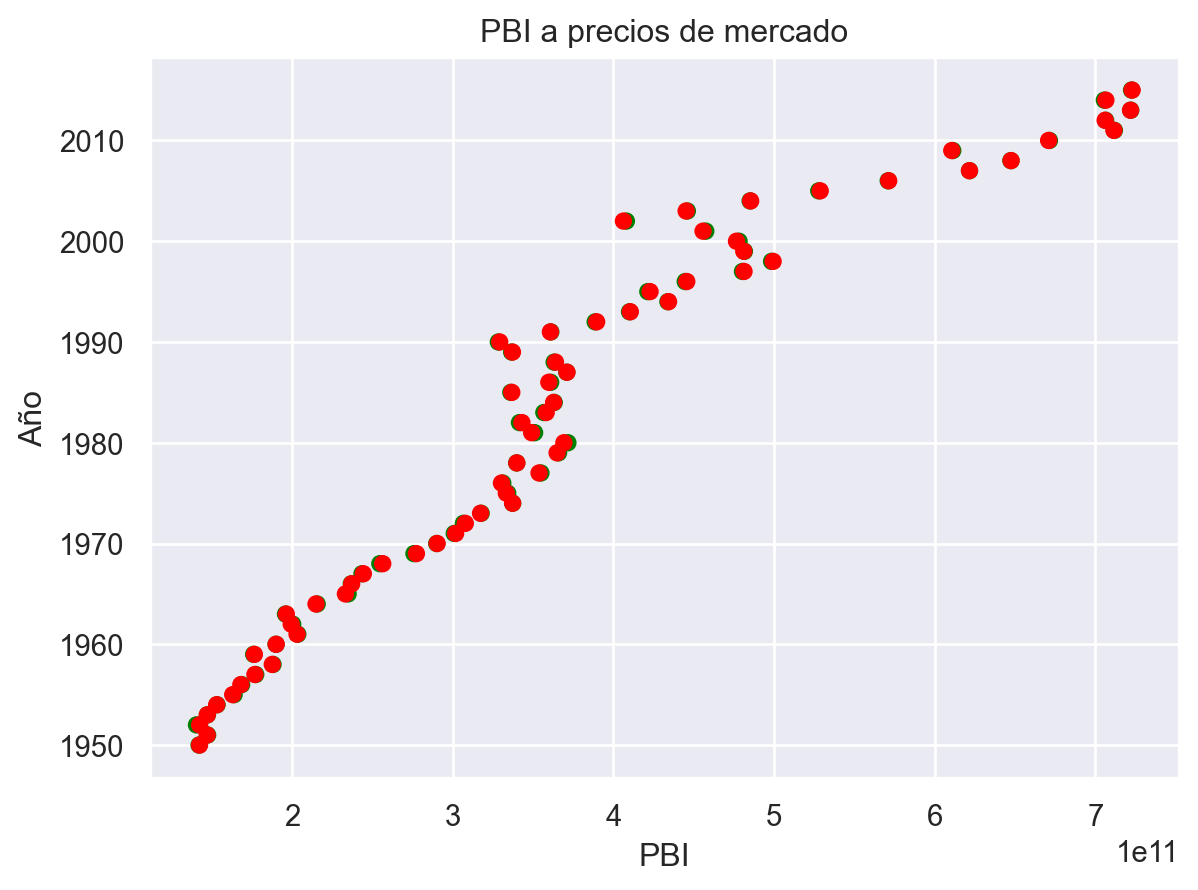

In [289]:
(
    so.Plot(data=df, x= df["PBI_a_precios_de_mercado.oferta"], y= df.index)
    .add(so.Dot(color="green"))
    .add(so.Dot(color="red"), x = df[0])
    .label(
        x="PBI",
        y="Año",
        title="PBI a precios de mercado",
    )
)

# Cómo haría el gráfico?

**17.** Hallar un escalamiento lineal f(x) que transforme los valores en el intervalo [2, 5] a valores en
el intevalo [0, 1].

In [314]:
scaler = MinMaxScaler()
valores = scaler.fit_transform(np.arange(2,6).reshape(-1, 1))
valores

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

**18.** Para este ejercicio utilizar los datos CollegeBasketballPlayers2009-2021.csv.

**(a)** Ajustar un modelo de regresi´on Ridge para predecir los puntos promedi (pts) en funci´on de 
las dem´as variables. Para ellos, escalar previamente las variables utilizando escalamient 
MinMax.

In [329]:
basket = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")
basket.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11928\2763165934.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  basket = pd.read_csv("CollegeBasketballPlayers2009-2021.csv")


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000


In [350]:
basket = basket.dropna()

In [351]:
basket = basket.select_dtypes(include=['number'])

In [352]:
y = basket["pts"]
X = basket.drop("pts", axis=1)

In [353]:
scaler = MinMaxScaler().set_output(transform = "pandas")
X_scaled = scaler.fit_transform(X)

In [362]:
alphas = np.array([0.001, 0.1, 1, 10, 100])
alpha = alphas[0]

In [369]:
for alpha in alphas:
    modeloRidge = linear_model.Ridge(alpha = alpha)
    modeloRidge.fit(X_scaled,y)
    y_pred = modeloRidge.predict(X_scaled)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"Para alpha: {alpha: .5} el rmse es: {rmse: .5}")

# alpha óptimo 0.001

Para alpha:  0.001 el rmse es:  0.47428
Para alpha:  0.1 el rmse es:  0.48659
Para alpha:  1.0 el rmse es:  0.56516
Para alpha:  10.0 el rmse es:  0.79076
Para alpha:  100.0 el rmse es:  1.6808


In [370]:
alpha_optimo = 0.001
modeloRidge = linear_model.Ridge(alpha = alpha_optimo)
modeloRidge.fit(X_scaled,y)
y_pred = modeloRidge.predict(X_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(r2, rmse)

0.9903606317706514 0.47427505333648917


(b) A partir de los resultados, seg´un los coeficientes obtenidos, ¿cu´ales son las 5 variables de
mayor peso en el modelo

In [371]:
modeloRidge.coef_

array([ -1.58972002,  -2.80132388,   6.65251908,   7.86402484,
        -1.1796831 ,   4.35934854,  -2.40013449,  -4.42903896,
        -1.05000998,  -0.7274724 ,   3.30200783,  -0.22590655,
        -1.05900125,   7.44445879,   5.36733923,  -1.39972491,
         3.78431924,   4.34896802,  -0.08450904,  -0.04331328,
        -4.72462522,   0.39150327,   6.35914051, -10.994918  ,
         1.70713269,   0.59615628,   0.16193191,  -0.10599314,
        -1.35094116,   3.50266751,  -3.21555142,   0.10138109,
        -1.16286687,  -0.73027245,   0.33746464,  -1.52491034,
         1.34581856,  -0.01780723,  -0.02750722,   0.41063925,
        -3.3703077 ,  -3.93653123,  -9.25499042,  -0.40474965,
        -0.75996284,   0.26727369,   1.94886638,   7.43273277,
         3.23829636,  -1.16946585,  -0.90240022,   5.24847636,
         3.75995575,  -0.30644415,   7.77173124,   1.2209597 ,
        -0.41261392])

# Ver bien cómo hacer la parte b)

In [375]:
# Obtener los coeficientes del modelo
coeficientes = modeloRidge.coef_

# Obtener los nombres de las variables
nombres_variables = X.columns

# Crear un DataFrame para facilitar la visualización
coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})
coeficientes_df = coeficientes_df.reindex(coeficientes_df['Coeficiente'].sort_values(ascending=False).index)

# Mostrar las 5 variables de mayor peso
print("\nLas 5 variables de mayor peso en el modelo:")
print(coeficientes_df.head(5))


Las 5 variables de mayor peso en el modelo:
   Variable  Coeficiente
3       usg     7.864025
54      stl     7.771731
13    twoPM     7.444459
47       mp     7.432733
2      Ortg     6.652519
